In [1]:
import pandas as pd

df = pd.read_csv('../data/transformer_data.csv')
df_meteo = pd.read_csv('../data/weather_data.csv')
df_tfinfo = pd.read_csv('../data/transformers_info_data.csv')

df_meteo.head()

,dateTime,locationId,temperature,windSpeed,relativeHumidityPercentage
0,2023-04-30 22:00:00,2,13.920,2.430,62.840
1,2023-04-30 22:15:00,2,13.855,2.395,62.845
2,2023-04-30 22:30:00,2,13.790,2.360,62.850
3,2023-04-30 22:45:00,2,13.725,2.325,62.855
4,2023-04-30 23:00:00,2,13.660,2.290,62.860


In [66]:
import pandas as pd
alldf = pd.read_csv('../data/all.csv')

In [71]:
alldf

,equipmentId,dateTime,load,hotspotTemperature,nominalLoad,locationId,coolingType,manufactureYear,commissioningDate,enclosure,...,heatRunTest_ambiantTemperature,heatRunTest_deltaTopOil,heatRunTest_deltaHotspot,heatRunTest_x,heatRunTest_y,heatRunTest_h,heatRunTest_gradient,temperature,windSpeed,relativeHumidityPercentage
0,50033827,2023-04-30 22:00:00,12294.37,41.02,40.0,2,ONAF1,2008,2010-03-17,1 wall,...,25.4,54.1,67.4,0.73,1.48,1.13,11.8,13.9200,2.430,62.840
1,50033827,2023-04-30 22:15:00,12115.62,41.38,40.0,2,ONAF1,2008,2010-03-17,1 wall,...,25.4,54.1,67.4,0.73,1.48,1.13,11.8,13.8550,2.395,62.845
2,50033827,2023-04-30 22:30:00,11374.81,41.38,40.0,2,ONAF1,2008,2010-03-17,1 wall,...,25.4,54.1,67.4,0.73,1.48,1.13,11.8,13.7900,2.360,62.850
3,50033827,2023-04-30 22:45:00,10417.08,40.78,40.0,2,ONAF1,2008,2010-03-17,1 wall,...,25.4,54.1,67.4,0.73,1.48,1.13,11.8,13.7250,2.325,62.855
4,50033827,2023-04-30 23:00:00,10130.00,40.50,40.0,2,ONAF1,2008,2010-03-17,1 wall,...,25.4,54.1,67.4,0.73,1.48,1.13,11.8,13.6600,2.290,62.860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093503,50249457,2025-02-28 21:45:00,12099.23,NaN,25.0,2,ONAF1,2011,2016-04-15,4 walls,...,23.0,51.9,67.7,0.66,1.34,1.10,14.4,3.2675,2.685,87.400
1093504,50249457,2025-02-28 22:00:00,11592.00,NaN,25.0,2,ONAF1,2011,2016-04-15,4 walls,...,23.0,51.9,67.7,0.66,1.34,1.10,14.4,3.0600,2.730,88.510
1093505,50249457,2025-02-28 22:15:00,11320.73,NaN,25.0,2,ONAF1,2011,2016-04-15,4 walls,...,23.0,51.9,67.7,0.66,1.34,1.10,14.4,NaN,NaN,NaN
1093506,50249457,2025-02-28 22:30:00,11050.42,NaN,25.0,2,ONAF1,2011,2016-04-15,4 walls,...,23.0,51.9,67.7,0.66,1.34,1.10,14.4,NaN,NaN,NaN


In [55]:
print(alldf.head())
print(alldf.tail()) 

   equipmentId             dateTime      load  hotspotTemperature  \
0     50033827  2023-04-30 22:00:00  12294.37               41.02   
1     50033827  2023-04-30 22:15:00  12115.62               41.38   
2     50033827  2023-04-30 22:30:00  11374.81               41.38   
3     50033827  2023-04-30 22:45:00  10417.08               40.78   
4     50033827  2023-04-30 23:00:00  10130.00               40.50   

   nominalLoad  locationId coolingType  manufactureYear commissioningDate  \
0         40.0           2       ONAF1             2008        2010-03-17   
1         40.0           2       ONAF1             2008        2010-03-17   
2         40.0           2       ONAF1             2008        2010-03-17   
3         40.0           2       ONAF1             2008        2010-03-17   
4         40.0           2       ONAF1             2008        2010-03-17   

  enclosure  ...  heatRunTest_ambiantTemperature  heatRunTest_deltaTopOil  \
0    1 wall  ...                            2

In [2]:
alldf['equipmentId'].unique()

array([50033827, 50282127, 50277055,  5004625,  5004597,    24917,
          33291,  5026188,  5017873,  5017843,    76075,    76632,
        5025312,  5030256, 50250035,  5027447, 50249457])

In [8]:
alldf_copy = alldf.copy()

In [68]:
alldf = alldf[alldf['hotspotTemperature'].isna() | (alldf['hotspotTemperature'] >= alldf['temperature'])]


In [70]:
# Filter for transformers 76075 and 76632
mask_76075_76632 = alldf['equipmentId'].isin([76075, 76632])
# Remove entries where hotspot temperature is 0 or higher than 70
mask_temp = (alldf['hotspotTemperature'] > 0) & (alldf['hotspotTemperature'] < 70)

# Apply conditions: keep all non-76075/76632 transformers, and filter temp conditions only for 76075/76632
alldf = alldf[~mask_76075_76632 | (mask_76075_76632 & (mask_temp | alldf['hotspotTemperature'].isna()))]


In [72]:
import pandas as pd
import matplotlib.pyplot as plt

def display_load_and_temperature(equipment_id):
    df = alldf[alldf['equipmentId'] == equipment_id]
    
    # Convertir dateTime en datetime si ce n'est pas déjà fait
    df['dateTime'] = pd.to_datetime(df['dateTime'])
    
    # Trier les données par dateTime
    df = df.sort_values(by='dateTime')

    # Sélectionner les colonnes pertinentes
    df = df[['dateTime', 'load', 'hotspotTemperature']]
    
    # Créer la figure
    plt.figure(figsize=(15, 5))
    
    # Créer deux axes
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    # Tracer la charge (load) sur l'axe de gauche
    ax1.plot(df['dateTime'], df['load'], 'b-', label='Load')
    ax1.set_ylabel('Load', color='b')
    ax1.set_xlabel('DateTime')
    
    # Tracer la température du hotspot sur l'axe de droite
    ax2.plot(df['dateTime'], df['hotspotTemperature'], 'r-', label='Hotspot Temperature')
    ax2.set_ylabel('Temperature (°C)', color='r')
    
    # Ajouter des légendes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    # Ajuster l'affichage des dates
    plt.xticks(rotation=45)
    
    plt.title(f"Load and Hotspot Temperature for Equipment {equipment_id}")
    plt.show()

array([50033827, 50282127, 50277055,  5004625,  5004597,    24917,
          33291,  5026188,  5017873,  5017843,    76075,    76632,
        5025312,  5030256, 50250035,  5027447, 50249457])

/var/folders/n9/q8bvx5ln4m10k1kwfc2w0zd40000gn/T/ipykernel_2245/4141273578.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dateTime'] = pd.to_datetime(df['dateTime'])


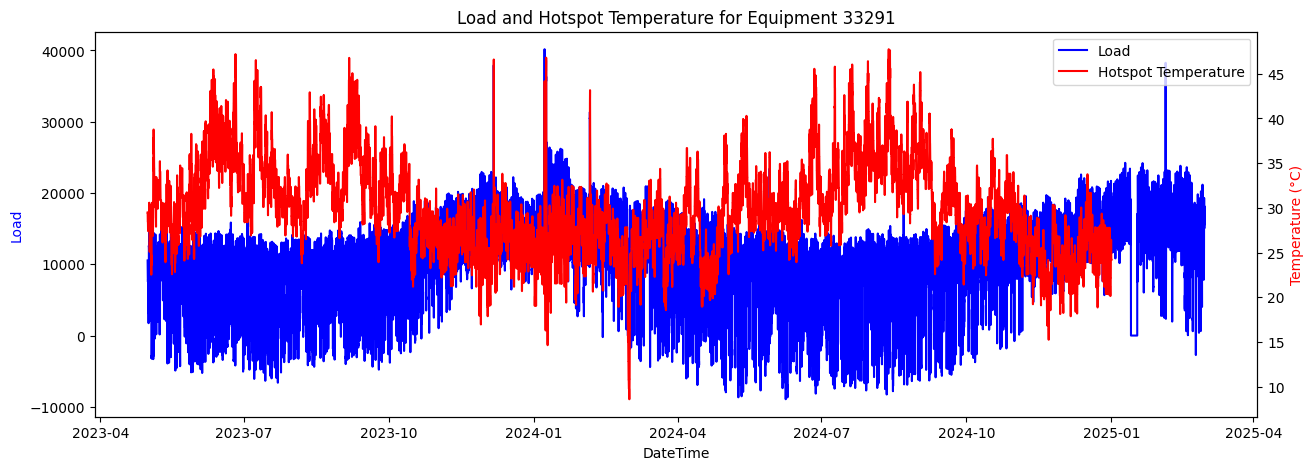

In [84]:
display_load_and_temperature(33291)

In [85]:
# Filter data for 2025
df_2025 = alldf[alldf['dateTime'].str.startswith('2025')]

# Count zero loads for each equipment in 2025
zero_loads_2025 = df_2025[df_2025['load'] == 0].groupby('equipmentId').size()

# Get total records for each equipment in 2025
total_records_2025 = df_2025.groupby('equipmentId').size()

# Calculate percentage
percentage_zero_loads = (zero_loads_2025 / total_records_2025 * 100).round(2)

# Create a DataFrame with results
result = pd.DataFrame({
    'zero_load_count': zero_loads_2025,
    'total_records': total_records_2025,
    'percentage': percentage_zero_loads
}).sort_values('percentage', ascending=False)

# Calculate global statistics
total_zero_loads = zero_loads_2025.sum()
total_records = total_records_2025.iloc[0] * len(total_records_2025)
global_percentage = (total_zero_loads / total_records * 100).round(2)

print(f"\nGlobal statistics:")
print(f"Total zero loads: {total_zero_loads}")
print(f"Total records: {total_records}")
print(f"Global percentage: {global_percentage}%")
print(result)


Global statistics:
Total zero loads: 859
Total records: 96220
Global percentage: 0.89%
             zero_load_count  total_records  percentage
equipmentId                                            
33291                  388.0           5660        6.86
5017843                224.0           5660        3.96
50249457               127.0           5660        2.24
5004597                 48.0           5660        0.85
50277055                33.0           5660        0.58
5026188                 19.0           5660        0.34
5004625                 18.0           5660        0.32
50033827                 2.0           5660        0.04
24917                    NaN           5660         NaN
76075                    NaN           5660         NaN
76632                    NaN           5660         NaN
5017873                  NaN           5660         NaN
5025312                  NaN           5660         NaN
5027447                  NaN           5660         NaN
5030256         

In [5]:
import pandas as pd

alldf = pd.read_csv('../data/all.csv')
clean_alldf = pd.read_csv('../data/clean_all.csv')

original_size = len(alldf)
cleaned_size = len(clean_alldf)

print(f"Original dataset size: {original_size:,} rows")
print(f"Cleaned dataset size: {cleaned_size:,} rows")
print(f"Removed rows: {original_size - cleaned_size:,}")
print(f"Percentage of data retained: {(cleaned_size/original_size*100):.2f}%")

Original dataset size: 1,093,508 rows
Cleaned dataset size: 1,040,819 rows
Removed rows: 52,689
Percentage of data retained: 95.18%


In [87]:
alldf.to_csv('../data/clean_all.csv')

In [7]:
clean_alldf

,Unnamed: 0,equipmentId,dateTime,load,hotspotTemperature,nominalLoad,locationId,coolingType,manufactureYear,commissioningDate,...,heatRunTest_ambiantTemperature,heatRunTest_deltaTopOil,heatRunTest_deltaHotspot,heatRunTest_x,heatRunTest_y,heatRunTest_h,heatRunTest_gradient,temperature,windSpeed,relativeHumidityPercentage
0,0,50033827,2023-04-30 22:00:00,12294.37,41.02,40.0,2,ONAF1,2008,2010-03-17,...,25.4,54.1,67.4,0.73,1.48,1.13,11.8,13.9200,2.430,62.840
1,1,50033827,2023-04-30 22:15:00,12115.62,41.38,40.0,2,ONAF1,2008,2010-03-17,...,25.4,54.1,67.4,0.73,1.48,1.13,11.8,13.8550,2.395,62.845
2,2,50033827,2023-04-30 22:30:00,11374.81,41.38,40.0,2,ONAF1,2008,2010-03-17,...,25.4,54.1,67.4,0.73,1.48,1.13,11.8,13.7900,2.360,62.850
3,3,50033827,2023-04-30 22:45:00,10417.08,40.78,40.0,2,ONAF1,2008,2010-03-17,...,25.4,54.1,67.4,0.73,1.48,1.13,11.8,13.7250,2.325,62.855
4,4,50033827,2023-04-30 23:00:00,10130.00,40.50,40.0,2,ONAF1,2008,2010-03-17,...,25.4,54.1,67.4,0.73,1.48,1.13,11.8,13.6600,2.290,62.860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040814,1093503,50249457,2025-02-28 21:45:00,12099.23,NaN,25.0,2,ONAF1,2011,2016-04-15,...,23.0,51.9,67.7,0.66,1.34,1.10,14.4,3.2675,2.685,87.400
1040815,1093504,50249457,2025-02-28 22:00:00,11592.00,NaN,25.0,2,ONAF1,2011,2016-04-15,...,23.0,51.9,67.7,0.66,1.34,1.10,14.4,3.0600,2.730,88.510
1040816,1093505,50249457,2025-02-28 22:15:00,11320.73,NaN,25.0,2,ONAF1,2011,2016-04-15,...,23.0,51.9,67.7,0.66,1.34,1.10,14.4,NaN,NaN,NaN
1040817,1093506,50249457,2025-02-28 22:30:00,11050.42,NaN,25.0,2,ONAF1,2011,2016-04-15,...,23.0,51.9,67.7,0.66,1.34,1.10,14.4,NaN,NaN,NaN


In [6]:
pd.read_csv('../data/transformers_info_data.csv')

,equipmentId,nominalLoad,locationId,coolingType,manufactureYear,commissioningDate,enclosure,heatRunTest_noLoadLosses,heatRunTest_copperLosses,heatRunTest_ambiantTemperature,heatRunTest_deltaTopOil,heatRunTest_deltaHotspot,heatRunTest_x,heatRunTest_y,heatRunTest_h,heatRunTest_gradient
0,50033827,40.0,26,ONAF1,2008,2010-03-17T00:00:00,1 wall,16.37,186.51,25.4,54.1,67.4,0.73,1.48,1.13,11.8
1,50282127,40.0,11,ONAF1,2015,2015-08-07T00:00:00,no wall,15.51,149.18,22.7,46.8,62.8,0.72,1.32,1.16,13.8
2,50277055,40.0,19,ONAF1,2013,2014-08-08T00:00:00,2 walls,15.51,149.18,22.7,46.8,62.8,0.72,1.32,1.16,13.8
3,5004625,40.0,5,ONAF1,2001,2008-01-01T00:00:00,* no info,16.02,223.28,27.8,48.9,65.7,0.62,1.98,1.30,12.9
4,5004597,40.0,5,ONAF1,2001,2008-01-01T00:00:00,* no info,16.15,216.05,25.0,48.9,65.7,0.62,1.98,1.30,12.9
5,24917,40.0,18,ONAF1,1997,2013-12-13T00:00:00,no wall,15.60,200.40,25.0,54.8,72.0,0.73,1.40,1.30,13.2
6,33291,50.0,23,ONAF1,1998,2008-01-01T00:00:00,no wall,19.97,244.30,25.0,47.9,65.4,0.74,1.43,1.30,13.5
7,5026188,50.0,23,ONAF1,2006,2007-10-02T00:00:00,no wall,18.15,271.80,31.2,49.4,71.9,0.79,1.39,1.30,17.3
8,5017873,25.0,16,ONAF1,2004,2005-11-23T00:00:00,3 walls,11.15,157.09,24.5,45.4,60.8,0.90,1.60,1.35,11.4
9,5017843,25.0,16,ONAF1,2005,2005-12-15T00:00:00,3 walls,11.15,157.09,24.5,45.4,60.8,0.90,1.60,1.35,11.4


In [8]:
trainable_data = clean_alldf
trainable_data['K'] = trainable_data['load'] / trainable_data['nominalLoad']

trainable_data.to_csv('../data/trainable_data.csv')
